In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
import json
import gzip
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import contractions
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('yourpath')

In [55]:
df

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164,[],[]
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X,[],[]
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240,[],[]
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710,[],[]
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590066,"[Cell Phones & Accessories, Accessories, Repla...",,[Compatible with:Motorola Moto G3 XT1552 G(201...,,Full LCD Touch Screen Digitizer Assembly Repla...,[],,hongkongruly,[Compatible with:Motorola Moto G3 XT1552 G(201...,"[>#1,179,531 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B01HJH76J4,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
590067,"[Cell Phones & Accessories, Cases, Holsters & ...",,[],,Universal Sports Armband Casehigh Shop Easy Fi...,[B01MDPWI5V],,CaseHQ,"[Universal Designed: Up to 5.7"" diagonal size....","663,487 in Cell Phones & Accessories (",[],{'ASIN: ': 'B01HJGI3VK'},Cell Phones & Accessories,,,$0.01,B01HJGI3VK,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
590068,"[Cell Phones & Accessories, Cases, Holsters & ...",,[<b>Brand Aim of LoHi:</b> <br /> LoHi is dedi...,,"iPhone 6 Plus Case, LoHi iPhone 6s Plus Case [...",[],,LoHi,[UNIQUE DESIGNED for Apple iPhone 6/6s Plus 5....,"[>#323,452 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,B01HJH9IN6,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
590069,"[Cell Phones & Accessories, Cases, Holsters & ...",,[],,Universal Sports Armband Casehigh Shop Easy Fi...,[],,CaseHQ,"[Universal Designed: Up to 5.7"" diagonal size....","1,662,046 in Cell Phones & Accessories (",[B00SXRXUFE],"{'ASIN: ': 'B01HJFFF1W', 'Item model number:':...",Cell Phones & Accessories,"class=""a-bordered a-horizontal-stripes a-spa...",,$3.99,B01HJFFF1W,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [33]:
df = df.drop_duplicates(subset='asin')

In [29]:
review_df = pd.read_json('yourpath', orient='records', lines=True)

In [30]:
review_df 

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN
1,5,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN
2,3,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN
3,2,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN
4,4,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1128432,4,True,"12 22, 2016",A1QWMCG1FNEP3A,B01HJC7N4C,NaN,Amazon Customer,Good for viewing. But doesn't have a button or...,Good,1482364800,NaN,NaN
1128433,5,False,"07 15, 2016",A3FOBEJ9UVUTR3,B01HJC7N4C,NaN,David Harlow,I was given the Rockrok 3D VR Glasses Headset ...,THE FUTURE IS NOW!!!!!!!,1468540800,NaN,NaN
1128434,5,False,"07 14, 2016",AMUEAMKB4E33M,B01HJC7N4C,NaN,Tom D,Super Fun! The RockRoc 3d vr headset is waaaay...,Get more out of your smartphone .......,1468454400,NaN,[https://images-na.ssl-images-amazon.com/image...
1128435,5,False,"07 13, 2016",A2EV91MMOJ3IL4,B01HJC7N4C,NaN,Timber12,Love it!\n\nI've had other VR glasses which al...,Join the VR fun train!,1468368000,NaN,NaN


In [34]:
merged_data = pd.merge(review_df, df, on='asin',how='left')

merged_data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,feature,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes
0,5,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,...,[Fashionable with unique 3D butterfly design f...,"[>#228,544 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
1,5,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,...,[Fashionable with unique 3D butterfly design f...,"[>#228,544 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
2,3,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,...,[Fashionable with unique 3D butterfly design f...,"[>#228,544 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
3,2,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,...,[Fashionable with unique 3D butterfly design f...,"[>#228,544 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...
4,4,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,...,[Fashionable with unique 3D butterfly design f...,"[>#228,544 in Cell Phones & Accessories (See T...",[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...


In [35]:
merged_data.shape

(1128437, 30)

In [36]:
merged_data.isnull().sum()

overall                  0
verified                 0
reviewTime               0
reviewerID               0
asin                     0
style               523196
reviewerName           135
reviewText             765
summary                517
unixReviewTime           0
vote               1036403
image              1101330
category               170
tech1                  170
description            170
fit                    170
title                  170
also_buy               170
tech2                  170
brand                  170
feature                170
rank                   170
also_view              170
details                170
main_cat               170
similar_item           170
date                   170
price                  170
imageURL               170
imageURLHighRes        170
dtype: int64

In [37]:
merged_data = merged_data.dropna(subset=['title'])

In [40]:
merged_data.title.unique()

array(['MinisDesign 3d Bling Crystal Bow Transparent Case for Apple Iphone 4 and 4s-Pink',
       'Rubberized Purple Wave Flower Snap on Design Case Hard Case Skin Cover Faceplate for Sprint Htc Evo 4g',
       'Black And Pink Leopard Rubberized Snap on Design Hard Case Faceplate for Sprint Htc Evo 4g',
       ...,
       'Oneplus 3 Screen Protector, E LV Tempered Glass Ultra-Clear High Definition Screen protector perfect fit for Oneplus 3',
       'Moto G4 Plus Screen Protector, Nillkin [H+ Pro] Tempered Glass 0.2mm 2.5D Round Edges Anti-glare High Clarity 9H Screen Hardness Anti-fingerprints Screen Protector for Moto G4 Plus 2016',
       'TrendON Apple iPhone 6 Plus and 6S Plus Case [Ultra Clear] Hard Back Panel, Raised Lip, Seamless Integrated Shock-Absorbing case (iPhone 6 Plus/iPhone 6S Plus Clear case)'],
      dtype=object)

In [64]:
# Filter the data for titles containing "Hitman"
product_reviews_headset = merged_data[merged_data['title'].str.contains("headset", case=False, regex=False)]

# Display the shape and first few rows of the filtered data
print(f"Shape of data for titles containing 'headset': {product_reviews_headset.shape}")


Shape of data for titles containing 'headset': (23810, 30)


In [65]:
product_reviews_headset.isnull().sum()

overall                0
verified               0
reviewTime             0
reviewerID             0
asin                   0
style              12043
reviewerName           9
reviewText             9
summary                2
unixReviewTime         0
vote               20942
image              23420
category               0
tech1                  0
description            0
fit                    0
title                  0
also_buy               0
tech2                  0
brand                  0
feature                0
rank                   0
also_view              0
details                0
main_cat               0
similar_item           0
date                   0
price                  0
imageURL               0
imageURLHighRes        0
dtype: int64

In [72]:
# Calculate the percentage of missing values in each column
missing_values = product_reviews_headset.isnull().sum() / len(product_reviews_headset) * 100
print("Percentage of missing values in each column:")
print(missing_values)


Percentage of missing values in each column:
overall             0.000000
verified            0.000000
reviewTime          0.000000
reviewerID          0.000000
asin                0.000000
style              50.579588
reviewerName        0.037799
reviewText          0.037799
summary             0.008400
unixReviewTime      0.000000
vote               87.954641
image              98.362033
category            0.000000
tech1               0.000000
description         0.000000
fit                 0.000000
title               0.000000
also_buy            0.000000
tech2               0.000000
brand               0.000000
feature             0.000000
rank                0.000000
also_view           0.000000
details             0.000000
main_cat            0.000000
similar_item        0.000000
date                0.000000
price               0.000000
imageURL            0.000000
imageURLHighRes     0.000000
dtype: float64


In [73]:
threshold = 50
columns_to_drop = missing_values[missing_values > threshold].index.tolist()

# Drop columns with too many missing values
product_reviews_headset_cleaned = product_reviews_headset.drop(columns=columns_to_drop)

In [75]:
product_reviews_headset_cleaned.isnull().sum()

overall            0
verified           0
reviewTime         0
reviewerID         0
asin               0
reviewerName       9
reviewText         9
summary            2
unixReviewTime     0
category           0
tech1              0
description        0
fit                0
title              0
also_buy           0
tech2              0
brand              0
feature            0
rank               0
also_view          0
details            0
main_cat           0
similar_item       0
date               0
price              0
imageURL           0
imageURLHighRes    0
dtype: int64

In [77]:
product_reviews_headset_cleaned1=product_reviews_headset_cleaned.dropna(subset=['reviewerName','reviewText','summary'])

In [85]:
product_reviews_headset_cleaned1.to_csv('newfile.csv', sep=',', encoding='utf-8', index = False)

In [88]:

# Concatenate 'reviewText' and 'summary' into a single 'review_text' column
product_reviews_headset_cleaned1.loc[:, 'review_text'] = product_reviews_headset_cleaned[['summary', 'reviewText']].apply(
    lambda x: " ".join(str(y) for y in x if pd.notnull(y)), axis=1
)

# Drop the original 'reviewText' and 'summary' columns
product_reviews_headset_final = product_reviews_headset_cleaned1.drop(['reviewText', 'summary'], axis=1)

# Display the first few rows to check
product_reviews_headset_final.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_8788\2124672879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews_headset_cleaned1.loc[:, 'review_text'] = product_reviews_headset_cleaned[['summary', 'reviewText']].apply(


,overall,verified,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,category,tech1,description,...,rank,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes,review_text
520,5,False,"12 23, 2002",A3OFBEIYJGHRV6,B00006Z95D,Phillip U.,1040601600,[],,[Jabra FreeSpeak is the ultimate hands-free an...,...,[],[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,An awesome headset! I am using the FreeSpeak f...
521,4,True,"10 23, 2002",AYID3D29GWY6N,B00006Z95D,JZ,1035331200,[],,[Jabra FreeSpeak is the ultimate hands-free an...,...,[],[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Doesn't work as well as I hoped... For the pri...
522,3,True,"11 5, 2003",A3LE6KDCI29ABR,B00006Z95D,D Brown,1067990400,[],,[Jabra FreeSpeak is the ultimate hands-free an...,...,[],[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"Great idea, could be better First off, the hea..."
523,1,False,"07 21, 2003",AJTUTIPTJTB3M,B00006Z95D,zebulon,1058745600,[],,[Jabra FreeSpeak is the ultimate hands-free an...,...,[],[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Confirming: DOES NOT WORK WITH 3650!! It has a...
524,1,True,"07 3, 2003",AV8MDYLHHTUOY,B00006Z95D,NoVA Music Lover,1057190400,[],,[Jabra FreeSpeak is the ultimate hands-free an...,...,[],[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Works with 3650? Don't believe it!!! I purchas...


In [91]:
product_reviews_headset_final['review_text'][520]

"An awesome headset! I am using the FreeSpeak for non-Bluetooth phones with my new T68i and I love it.  The Bluetooth multi-adapter for my old non-Bluetooth phone worked great, but the phone didn't support headset initiated call answering, voice dialing or call ending []a pain if you're going to be using any headset.\nSo I got the T68i and I am finally enjoying true cordless freedom.\nAs a note, I do notice that my range with the T68i is far less than with the Jabra multi-adapter.  With the adapter I got a good 30 feet of range from the phone/adapter to the headset.  With the T68i, I'm geting maybe ten feet, max.  Apparently SonyEricsson's implementation of Bluetooth isn't up to par.  But you can't fault the headset for that.\nAlso, I think the belt-clip/charger needs some sort of positive lock to prevent losing the headset which with its light weight makes little noise when it's dropped and to secure its position while charging."

In [94]:
# Classify ratings as good (>= 3) or bad (< 3)
good_rate = len(product_reviews_headset_final[product_reviews_headset_final['overall'] >= 3])
bad_rate = len(product_reviews_headset_final[product_reviews_headset_final['overall'] < 3])

# Printing rates and their total numbers
print('Good ratings: {} reviews for Headset products'.format(good_rate))
print('Bad ratings: {} reviews for Headset products'.format(bad_rate))

Good ratings: 19595 reviews for Headset products
Bad ratings: 4195 reviews for Headset products


In [96]:
# Apply the new classification to the overall column
product_reviews_headset_final['rating_class'] = product_reviews_headset_final['overall'].apply(lambda x: 'bad' if x < 3 else 'good')

# Display the first few rows to check
product_reviews_headset_final.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,unixReviewTime,category,tech1,description,...,also_view,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes,review_text,rating_class
520,5,False,"12 23, 2002",A3OFBEIYJGHRV6,B00006Z95D,Phillip U.,1040601600,[],,[Jabra FreeSpeak is the ultimate hands-free an...,...,[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,An awesome headset! I am using the FreeSpeak f...,good
521,4,True,"10 23, 2002",AYID3D29GWY6N,B00006Z95D,JZ,1035331200,[],,[Jabra FreeSpeak is the ultimate hands-free an...,...,[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Doesn't work as well as I hoped... For the pri...,good
522,3,True,"11 5, 2003",A3LE6KDCI29ABR,B00006Z95D,D Brown,1067990400,[],,[Jabra FreeSpeak is the ultimate hands-free an...,...,[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"Great idea, could be better First off, the hea...",good
523,1,False,"07 21, 2003",AJTUTIPTJTB3M,B00006Z95D,zebulon,1058745600,[],,[Jabra FreeSpeak is the ultimate hands-free an...,...,[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Confirming: DOES NOT WORK WITH 3650!! It has a...,bad
524,1,True,"07 3, 2003",AV8MDYLHHTUOY,B00006Z95D,NoVA Music Lover,1057190400,[],,[Jabra FreeSpeak is the ultimate hands-free an...,...,[],{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Works with 3650? Don't believe it!!! I purchas...,bad


In [98]:
# Checking for duplicates based on 'asin', 'reviewerName', and 'unixReviewTime' columns
duplicates = product_reviews_headset_final.duplicated(subset=['asin', 'reviewerName', 'unixReviewTime'], keep=False)

# Displaying the duplicated rows
duplicated_rows = product_reviews_headset_final[duplicates]
print(f"Number of duplicate rows: {duplicated_rows.shape[0]}")



Number of duplicate rows: 830


In [99]:
# drop the duplicates and keep only unique rows
product_reviews_headset_final = product_reviews_headset_final.drop_duplicates(subset=['asin', 'reviewerName', 'unixReviewTime'])

# Display the shape of the DataFrame after dropping duplicates
print(f"Shape after dropping duplicates: {product_reviews_headset_final.shape}")


Shape after dropping duplicates: (23370, 27)


In [100]:
# Convert 'reviewTime' to datetime and create a new column named 'time'
product_reviews_headset_final['time'] = pd.to_datetime(product_reviews_headset_final['reviewTime'], format='%m %d, %Y')

# Drop redundant 'reviewTime' column
product_reviews_headset_final = product_reviews_headset_final.drop('reviewTime', axis=1)

# Display the first few rows to check
product_reviews_headset_final.head()


C:\Users\Admin\AppData\Local\Temp\ipykernel_8788\1424466297.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_reviews_headset_final['time'] = pd.to_datetime(product_reviews_headset_final['reviewTime'], format='%m %d, %Y')


,overall,verified,reviewerID,asin,reviewerName,unixReviewTime,category,tech1,description,fit,...,details,main_cat,similar_item,date,price,imageURL,imageURLHighRes,review_text,rating_class,time
520,5,False,A3OFBEIYJGHRV6,B00006Z95D,Phillip U.,1040601600,[],,[Jabra FreeSpeak is the ultimate hands-free an...,,...,{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,An awesome headset! I am using the FreeSpeak f...,good,2002-12-23
521,4,True,AYID3D29GWY6N,B00006Z95D,JZ,1035331200,[],,[Jabra FreeSpeak is the ultimate hands-free an...,,...,{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Doesn't work as well as I hoped... For the pri...,good,2002-10-23
522,3,True,A3LE6KDCI29ABR,B00006Z95D,D Brown,1067990400,[],,[Jabra FreeSpeak is the ultimate hands-free an...,,...,{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,"Great idea, could be better First off, the hea...",good,2003-11-05
523,1,False,AJTUTIPTJTB3M,B00006Z95D,zebulon,1058745600,[],,[Jabra FreeSpeak is the ultimate hands-free an...,,...,{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Confirming: DOES NOT WORK WITH 3650!! It has a...,bad,2003-07-21
524,1,True,AV8MDYLHHTUOY,B00006Z95D,NoVA Music Lover,1057190400,[],,[Jabra FreeSpeak is the ultimate hands-free an...,,...,{},Cell Phones & Accessories,,,,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,Works with 3650? Don't believe it!!! I purchas...,bad,2003-07-03


In [101]:
# Rename columns 'overall' to 'rating' and 'asin' to 'product_id'
product_reviews_headset_final = product_reviews_headset_final.rename(columns={'overall': 'rating', 'asin': 'product_id'})


In [102]:
# DESCRIPTIVE STATISTICS
##########################################

print("================================================")

# Total reviews
total_reviews = len(product_reviews_headset_final)
print("Number of reviews: ", total_reviews)
print()

# How many unique reviewers?
unique_reviewers = len(product_reviews_headset_final.reviewerID.unique())
print("Number of unique reviewers: ", unique_reviewers)
reviewer_prop = float(unique_reviewers / total_reviews)
print("Proportion of unique reviewers: ", round(reviewer_prop, 3))
print()

# How many unique products?
unique_products = len(product_reviews_headset_final.product_id.unique())
print("Number of unique products: ", unique_products)
product_prop = float(unique_products / total_reviews)
print("Proportion of unique products: ", round(product_prop, 3))
print()

# Average rating score
average_rating = round(product_reviews_headset_final.rating.mean(), 3)
print("Average rating score: ", average_rating)
print()

# Rating distribution
rating_distribution = product_reviews_headset_final['rating'].value_counts().sort_index()
print("Rating distribution:")
print(rating_distribution)
print()

# Most common rating
most_common_rating = product_reviews_headset_final['rating'].mode()[0]
print("Most common rating: ", most_common_rating)
print()

# Reviews over time (first and last review dates)
first_review_date = product_reviews_headset_final['time'].min()
last_review_date = product_reviews_headset_final['time'].max()
print("First review date: ", first_review_date)
print("Last review date: ", last_review_date)
print()

# Descriptive statistics for review length (number of words)
product_reviews_headset_final['review_length'] = product_reviews_headset_final['review_text'].apply(lambda x: len(x.split()))
average_review_length = product_reviews_headset_final['review_length'].mean()
print("Average review length (words): ", round(average_review_length, 2))
print()

# Distribution of verified purchase reviews
verified_distribution = product_reviews_headset_final['verified'].value_counts(normalize=True) * 100
print("Distribution of verified purchase reviews:")
print(verified_distribution)
print()

# Number of reviews per product
reviews_per_product = product_reviews_headset_final.groupby('product_id')['reviewerID'].count()
average_reviews_per_product = reviews_per_product.mean()
print("Average number of reviews per product: ", round(average_reviews_per_product, 2))
print()

# Top 5 products with the most reviews
top_products = reviews_per_product.sort_values(ascending=False).head(5)
print("Top 5 products with the most reviews:")
print(top_products)
print()


Number of reviews:  23370

Number of unique reviewers:  18384
Proportion of unique reviewers:  0.787

Number of unique products:  837
Proportion of unique products:  0.036

Average rating score:  3.934

Rating distribution:
1     2250
2     1841
3     2872
4     4635
5    11772
Name: rating, dtype: int64

Most common rating:  5

First review date:  2002-10-23 00:00:00
Last review date:  2018-09-21 00:00:00

Average review length (words):  83.9

Distribution of verified purchase reviews:
True     84.540009
False    15.459991
Name: verified, dtype: float64

Average number of reviews per product:  27.92

Top 5 products with the most reviews:
product_id
B0092KJ9BU    1063
B0093TSSGW     702
B007C5S3AU     568
B00W3TAMG8     525
B005FPT380     370
Name: reviewerID, dtype: int64



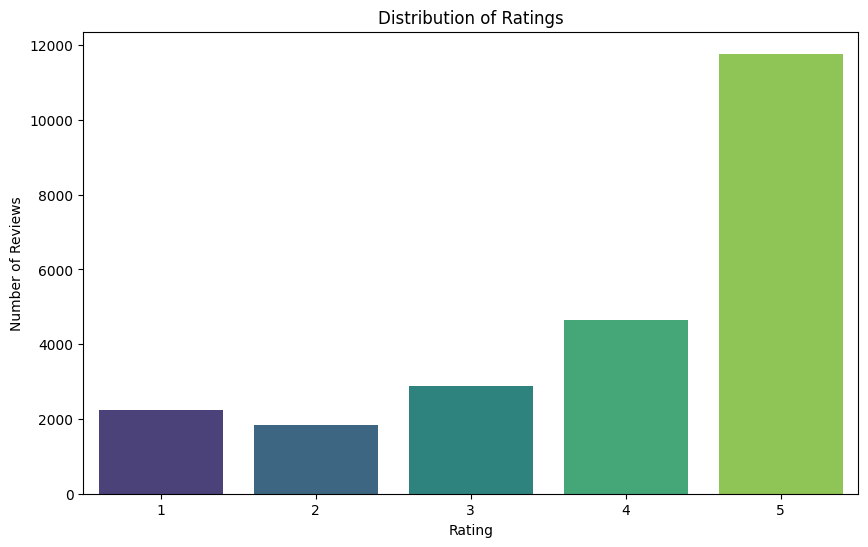

Insights:
1. Identify the most common ratings and their implications.
2. Check for skewness towards higher or lower ratings.
3. Evaluate the spread of ratings to understand variability in customer experiences.
4. Spot potential issues indicated by low ratings.
5. Compare the observed distribution with expected patterns for high-quality products.


In [103]:
# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the distribution of ratings
sns.countplot(x='rating', data=product_reviews_headset_final, palette='viridis')

# Add titles and labels
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()

# Generate insights
print("Insights:")
print("1. Identify the most common ratings and their implications.")
print("2. Check for skewness towards higher or lower ratings.")
print("3. Evaluate the spread of ratings to understand variability in customer experiences.")
print("4. Spot potential issues indicated by low ratings.")
print("5. Compare the observed distribution with expected patterns for high-quality products.")


##  Preprocessing Steps



In [107]:
# Function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)


In [108]:

# Function to remove special characters
def remove_special_characters(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    return text


In [110]:

# Function to tokenize text
def tokenize_text(text):
    return word_tokenize(text)


In [111]:
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    tokens = tokenize_text(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)


In [118]:

lemmatizer = WordNetLemmatizer()

# Function to lemmatize words
def lemmatize_text(text):
    tokens = tokenize_text(text)
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)


In [120]:
def preprocess_text(text):
    text = expand_contractions(text)
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text)
    return text

# Apply the preprocessing function to the review_text column
product_reviews_headset_final['cleaned_review_text'] = product_reviews_headset_final['review_text'].apply(preprocess_text)

# Display the first few rows to check
print(product_reviews_headset_final[[ 'cleaned_review_text']].head())


                                   cleaned_review_text
520  awesome headset using FreeSpeak nonBluetooth p...
521  work well hoped price guess say ok deal since ...
522  Great idea could better First headset purchase...
523  Confirming WORK series flaky behavior nominall...
524  Works believe purchased item recently use Noki...


In [123]:
product_reviews_headset_final.to_csv('newfile.csv', sep=',', encoding='utf-8', index = False)

In [124]:
product_reviews_headset_final.to_json('newfile.json')